In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler  # , scale #, Imputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [3]:
df = pd.read_csv("profiles.csv")

print(df.columns)
'''
print(df.columns)
print(df.education.value_counts())
print(df.head())
print(df.columns)
print(df.diet.value_counts())
print(df.body_type.value_counts())
print(df.education.value_counts())
print(df.orientation.value_counts())
print(df.religion.value_counts())
print(df.ethnicity.value_counts())
print(df.status.value_counts())
print(df.sex.value_counts())
print(df.income.value_counts())
#print(df.drugs.value_counts())
'''

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')


'\nprint(df.columns)\nprint(df.education.value_counts())\nprint(df.head())\nprint(df.columns)\nprint(df.diet.value_counts())\nprint(df.body_type.value_counts())\nprint(df.education.value_counts())\nprint(df.orientation.value_counts())\nprint(df.religion.value_counts())\nprint(df.ethnicity.value_counts())\nprint(df.status.value_counts())\nprint(df.sex.value_counts())\nprint(df.income.value_counts())\n#print(df.drugs.value_counts())\n'

In [4]:
# remapping various qualitative descriptors as numerical
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
smokes_mapping = {"no": 0, "trying to quit": 1, "when drinking": 2, "sometimes": 3, "yes": 4}
drugs_mapping = {"never": 0, "sometimes": 1, "often": 2}
sex_mapping = {"m": 0, "f": 1}
body_mapping = {"average": 0, "fit": 1, "athletic": 2, "thin": 3, "curvy": 4, "a little extra": 5, "skinny": 6,
                "full figured": 7, "overweight": 8, "jacked": 9, "used up": 10, "rather not say": 11}
'''
0: high school
1: 2-year college
2: undergrad
3: masters
4: phd
5: med school
6: law school
everything else NaN
'''
edu_mapping = {"graduated from college/university": 2,
               "graduated from masters program": 3,
               "working on college/university": np.nan,
               "working on masters program": np.nan,
               "graduated from two-year college": 1,
               "graduated from high school": 0,
               "graduated from ph.d program": 4,
               "graduated from law school": 6,
               "working on two-year college": np.nan,
               "dropped out of college/university": np.nan,
               "working on ph.d program": np.nan,
               "college/university": 2,
               "graduated from space camp": np.nan,
               "dropped out of space camp": np.nan,
               "graduated from med school": 5,
               "working on space camp": np.nan,
               "working on law school": 6,
               "two-year college": 1,
               "working on med school": np.nan,
               "dropped out of two-year college": np.nan,
               "dropped out of masters program": np.nan,
               "masters program": 3,
               "dropped out of ph.d program": np.nan,
               "dropped out of high school": np.nan,
               "high school": 0,
               "working on high school": np.nan,
               "space camp": np.nan,
               "ph.d program": 4,
               "law school": 6,
               "dropped out of law school": np.nan,
               "dropped out of med school": np.nan,
               "med school": 5}
'''
0: anything
1: vegetarian
2: vegan
3: kosher
4: halal
5: other
'''

'\n0: anything\n1: vegetarian\n2: vegan\n3: kosher\n4: halal\n5: other\n'

In [5]:
diet_mapping = {"mostly anything": 0,
                "anything": 0,
                "strictly anything": 0,
                "mostly vegetarian": 1,
                "mostly other": 5,
                "strictly vegetarian": 1,
                "vegetarian": 1,
                "strictly other": 5,
                "mostly vegan": 2,
                "other": 5,
                "strictly vegan": 2,
                "vegan": 2,
                "mostly kosher": 3,
                "mostly halal": 4,
                "strictly kosher": 3,
                "strictly halal": 4,
                "kosher": 3,
                "halal": 4}


In [7]:
# Create new columns

In [8]:
df["drinks_code"] = df.drinks.map(drink_mapping)
df["smokes_code"] = df.smokes.map(smokes_mapping)
df["drugs_code"] = df.smokes.map(drugs_mapping)
df["sex_code"] = df.sex.map(sex_mapping)
df["body_code"] = df.body_type.map(body_mapping)
df["edu_code"] = df.education.map(edu_mapping)
df["diet_code"] = df.diet.map(diet_mapping)


In [9]:
# data on total length of essay responses
essay_cols = ["essay0", "essay1", "essay2", "essay3", "essay4", "essay5", "essay6", "essay7", "essay8", "essay9"]
# Removing the NaNs
all_essays = df[essay_cols].replace(np.nan, '', regex=True)
# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)
df["essay_len"] = all_essays.apply(lambda x: len(x))


In [10]:
# average length of all essay responses
all_essays_split = all_essays.str.split()

In [11]:
def avg_word_length(essay):
    total_letters = 0
    num_words = 0
    if len(essay) == 0:
        return 0
    else:
        for word in essay:
            total_letters += len(word)
            num_words += 1
        return total_letters / num_words


In [12]:
df["avg_word_length"] = all_essays_split.apply(lambda x: avg_word_length(x))

In [13]:
# multiple linear regression
# can we predict income from somebody's sex, age, education, and length of their essay response
income_data = df[["income", "sex_code", "age", "edu_code", "essay_len"]]
income_features = ["sex_code", "age", "edu_code", "essay_len"]
income_data["income_corrected"] = income_data.income.apply(lambda x: np.nan if (x == -1) else x)
income_data_corrected = income_data[["income_corrected", "sex_code", "age", "edu_code", "essay_len"]].reset_index()
filtered_income = income_data_corrected.dropna().reset_index()
income_labels = filtered_income["income_corrected"]
income_predictors = filtered_income[income_features]

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [14]:
# separate training and testing sets
X_train, X_test, y_train, y_test = train_test_split(income_predictors, income_labels, test_size=0.2, random_state=1)

In [15]:
# train model
model = LinearRegression()
model.fit(X_train, y_train)
# model.score(X_train, y_train)

LinearRegression()

MLR of income based on age, sex education, and length of essay responses
Train Score: 0.014084097970939569
Test Score: 0.017920571892718895


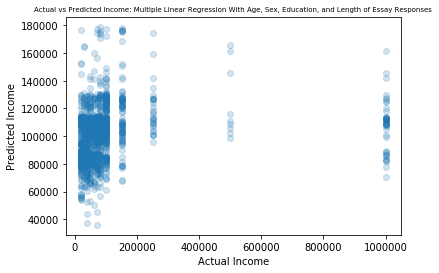

In [16]:
# score and visualize
print("MLR of income based on age, sex education, and length of essay responses")
print('Train Score:', model.score(X_train, y_train))
print('Test Score:', model.score(X_test, y_test))
y_predict = model.predict(X_test)
plt.scatter(y_test, y_predict, alpha=0.2)
plt.xlabel("Actual Income")
plt.ylabel("Predicted Income")
plt.title(
    "Actual vs Predicted Income: Multiple Linear Regression With Age, Sex, Education, and Length of Essay Responses",
    fontsize=7)
plt.savefig("MLR_income.png")
plt.show()

In [17]:
# k-nearest neighbors
# can we predict body type from somebody's diet, smoking, drinking, drug habits, and age?
body_type_labels = df["body_code"]
features = ["smokes_code", "drinks_code", "drugs_code", "age", "diet_code"]

In [18]:
# clean the data
body_type_labels.fillna(11, inplace=True)
body_type_data = df[features].reset_index()
body_type_data.fillna(body_type_data.mean(), inplace=True)
body_type_data.replace([np.inf, -np.inf], [body_type_data.mean(), body_type_data.mean()], inplace=True)


In [19]:
# normalize the data
# scaled_body_type_data = scale(body_type_data[features], axis=0)
min_max_scaler = MinMaxScaler()
scaled_body_type_data = min_max_scaler.fit_transform(body_type_data.values)


In [20]:
# separate training and testing sets
train_data, test_data, train_labels, test_labels = \
    train_test_split(scaled_body_type_data, body_type_labels, test_size=0.2, random_state=1)

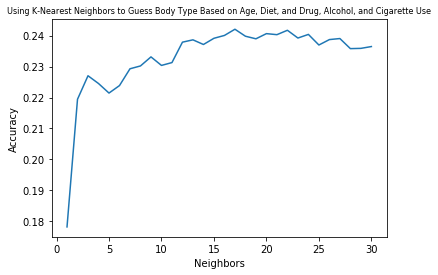

In [21]:
# K-Nearest Neighbors classifier - plot showing relationship of number of ks to accuracy
accuracy = []
ks = range(1, 31)

for k in ks:
    classifierkn = KNeighborsClassifier(n_neighbors=k)
    classifierkn.fit(train_data, train_labels)
    accuracy.append(classifierkn.score(test_data, test_labels))

plt.plot(ks, accuracy)
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.title("Using K-Nearest Neighbors to Guess Body Type Based on Age, Diet, and Drug, Alcohol, and Cigarette Use",
          fontsize=8)
plt.savefig("KNN_body_type_ks.png")
plt.show()


In [22]:
# Score output of K-Neighbors classifier with highest accuracy
classifier3 = KNeighborsClassifier(n_neighbors=17)
classifier3.fit(train_data, train_labels)
print(classifier3.score(test_data, test_labels))

print("accuracy score: %s" % accuracy_score(test_labels, classifier3.predict(test_data)))
print("recall score: %s" % recall_score(test_labels, classifier3.predict(test_data), average=None))
print("precision score: %s" % precision_score(test_labels, classifier3.predict(test_data), average=None))
# print("f1 score: %s" %f1_score(test_labels, classifier3.predict(test_data), average=None))


0.24203502919099248
accuracy score: 0.24203502919099248
recall score: [0.47423729 0.3172147  0.22755013 0.01462905 0.01772152 0.00557621
 0.00286533 0.         0.         0.         0.         0.11548791]
precision score: [0.25166397 0.25529265 0.2234589  0.11023622 0.13333333 0.08571429
 0.04761905 0.         0.         0.         0.         0.21901528]


In [23]:
# multiple linear regression
# can we predict age from somebody's diet, smoking, drinking, drug habits, and body type?
body_type_labels.reset_index(drop=True, inplace=True)
body_type_data.reset_index(drop=True, inplace=True)
body_type_merged = pd.concat([body_type_labels, body_type_data], axis=1)
# print(body_type_merged.head())
age_labels = body_type_merged.age
age_data = body_type_merged[["body_code", "smokes_code", "drinks_code", "diet_code"]]


In [24]:
# separate training and testing sets
X_train, X_test, y_train, y_test = train_test_split(age_data, age_labels, test_size=0.2, random_state=1)


In [25]:
# train model
model = LinearRegression()
model.fit(X_train, y_train)
# model.score(X_train, y_train)

LinearRegression()

MLR of age based on lifestyle
Train Score: 0.03972473839963986
Test Score: 0.03739736327519272


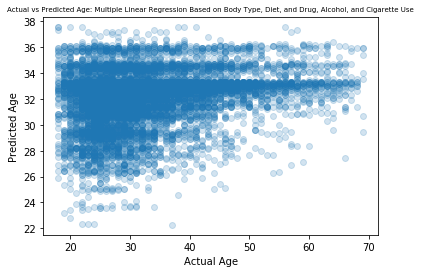

In [26]:
# score and visualize
print("MLR of age based on lifestyle")
print('Train Score:', model.score(X_train, y_train))
print('Test Score:', model.score(X_test, y_test))
y_predict = model.predict(X_test)
plt.scatter(y_test, y_predict, alpha=0.2)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title(
    "Actual vs Predicted Age: Multiple Linear Regression Based "
    "on Body Type, Diet, and Drug, Alcohol, and Cigarette Use",
    fontsize=7)
plt.savefig("MLR_age.png")
plt.show()

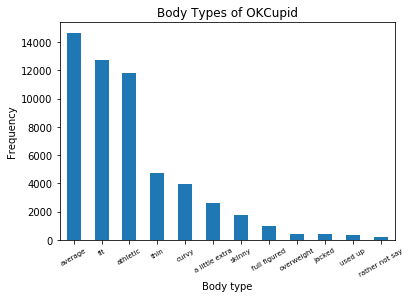

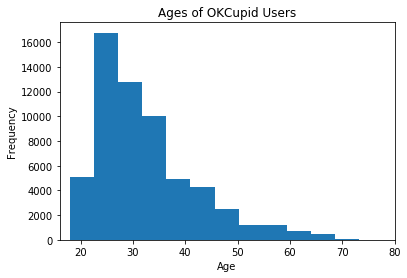

C:\Users\HP\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\HP\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


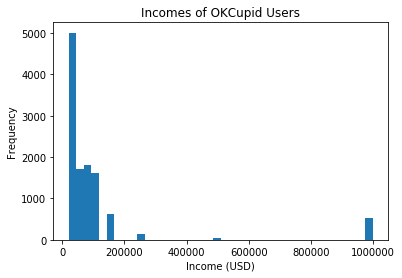

In [27]:
# plots
body_type = pd.value_counts(df["body_type"].values, sort=True)
ax = body_type.plot(kind='bar', title='Body Types of OKCupid')
ax.set(xlabel='Body type', ylabel='Frequency')
plt.xticks(fontsize=7, rotation=30)
plt.savefig("body_types.png")
plt.show()

plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Ages of OKCupid Users")
plt.xlim(16, 80)
plt.savefig("ages.png")
plt.show()

plt.hist(income_data_corrected.income_corrected, bins=40)
plt.xlabel("Income (USD)")
plt.ylabel("Frequency")
plt.title("Incomes of OKCupid Users")
plt.savefig("incomes.png")
plt.show()